# Compare latitudinal grid spacing in GISS-H, GISS-G, and ECCO

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pych.ecco as pe
import ecco_v4_py as ecco
from pych.plot import nice_inward_ticks

In [2]:
plt.rcParams.update({'font.size':18,'axes.labelsize':18,'axes.titlesize':22,'text.usetex':True})

In [3]:
fig_dir = '/workspace/results/eccov4r4/equatorial-under-current/figures/'

In [4]:
if not os.path.isdir(fig_dir):
    os.makedirs(fig_dir)

## ECCOv4

In [5]:
ds = pe.read_mds('/workspace/grids/llc90',iters=None)

/workspace/xmitgcm/xmitgcm/mds_store.py:854: UserWarning: Couldn't find available_diagnostics.log in /workspace/grids/llc90 or /workspace/grids/llc90. Using default version.
  "in %s or %s. Using default version." % (data_dir, grid_dir))


In [6]:
grid = ecco.get_llc_grid(ds)

### Meridional Grid Spacing

In [7]:
lon = -140

In [8]:
maskW,maskS = ecco.calc_section_trsp._parse_section_trsp_inputs(ds,[lon,2],[lon,-2],None,None,'EUC')

/workspace/ECCOv4-py/ecco_v4_py/get_section_masks.py:51: UserWarning: 
Section name euc unavailable as pre-defined section
  warnings.warn('\nSection name %s unavailable as pre-defined section' % section_name)


In [9]:
lon=-140
maskW,maskS = ecco.calc_section_trsp._parse_section_trsp_inputs(ds,[lon,2],[lon,-2],None,None,'EUC')

/workspace/ECCOv4-py/ecco_v4_py/get_section_masks.py:51: UserWarning: 
Section name euc unavailable as pre-defined section
  warnings.warn('\nSection name %s unavailable as pre-defined section' % section_name)


In [10]:
ecco_center_points = grid.interp(ds.YC,'Y',boundary='fill').where(maskS,drop=True).squeeze()
ecco_bds = ecco_center_points - ecco_center_points.diff('i')/2 
ecco_dLat = (ds.dxG.where(maskS,drop=True)/1000).squeeze()
ecco_dLatMid = (ecco_dLat+ecco_dLat.shift(i=-1)).dropna('i')/2

## GISS-G

In [11]:
gissg = xr.open_dataset('/workspace/results/giss-euc/giss_g.nc')

In [12]:
gissg_center_points = gissg.YC.sel(YC=slice(-2.5,2.5))
gissg_bds = gissg_center_points - gissg_center_points.diff('YC')/2 

gissg_dLat = (gissg.dyG.sel(YC=slice(-2.5,2.5)).sel(XG=lon,method='nearest')/1000)
gissg_dLatMid = (gissg_dLat+gissg_dLat.shift(YC=-1)).dropna('YC')/2

## GISS-H

In [13]:
gissh = xr.open_dataset('/workspace/results/giss-euc/giss_h.nc')

In [14]:
gissh_center_points = gissh.YC.sel(YC=slice(-2.5,2.5))
gissh_bds = gissh_center_points - gissh_center_points.diff('YC')/2 

gissh_dLat = (gissh.dyG.sel(YC=slice(-2.5,2.5)).sel(XG=lon,method='nearest')/1000)
gissh_dLatMid = (gissh_dLat+gissh_dLat.shift(YC=-1)).dropna('YC')/2

In [15]:
gissh.YG

<xarray.DataArray 'YG' (YG: 16)>
array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.,
       11., 12.], dtype=float32)
Coordinates:
  * YG       (YG) float32 -3.0 -2.0 -1.0 0.0 1.0 2.0 ... 8.0 9.0 10.0 11.0 12.0
Attributes:
    axis:               Y
    c_grid_axis_shift:  -0.5

## Plots

### Grid spacing

In [25]:
x=ecco_bds.where(np.abs(ecco_bds)<.45).values

In [26]:
ecco_dLatMid.where(~np.isnan(x)).values

array([        nan,         nan,         nan, 44.88289383, 44.44294423,
       44.88289383,         nan,         nan,         nan])

In [60]:
def get_highlight(x,y,cutoff,ax,xextra=None,yextra=None,**kwargs):
    index = np.abs(x)<cutoff
    xx = x.where(index).values
    yy = y.where(~np.isnan(xx)).values
    if xextra is not None:
        xxx = np.concatenate([[-xextra],xx,[xextra]])
        yyy = np.concatenate([[yextra],yy,[yextra]])
    else:
        xxx=xx
        yyy=yy
    xxx=xxx[~np.isnan(xxx)]
    index = np.argsort(xxx)
    xxx = xxx[index]
    yyy=yyy[~np.isnan(yyy)][index]
    ax.plot(xxx,yyy,**kwargs)

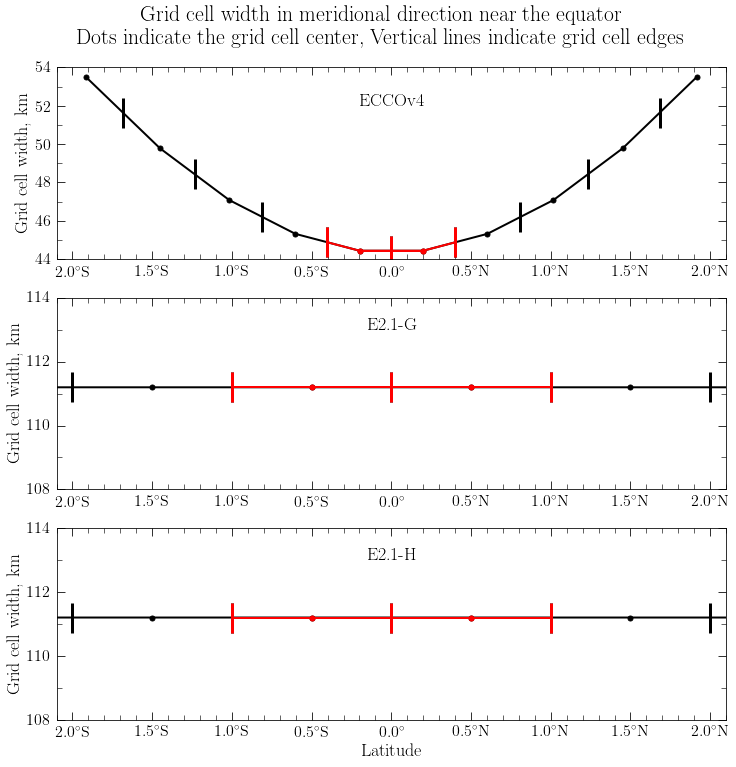

In [65]:
nrows= 3
fig,axs = plt.subplots(nrows,1,figsize=(12,nrows*4))

ax=axs[0]
ax.plot(ecco_center_points,ecco_dLat,marker='.',markersize=10,color='k')
ax.plot(ecco_bds,ecco_dLatMid,marker='|',markersize=30,markeredgewidth=3,linestyle='',color='k')
get_highlight(ecco_center_points,ecco_dLat,cutoff=.3,ax=ax,
             marker='.',markersize=10,color='r',linestyle='-')
get_highlight(ecco_bds,ecco_dLatMid,cutoff=.45,ax=ax,
             marker='|',markersize=30,markeredgewidth=3,linestyle='',color='r')
get_highlight(ecco_center_points,ecco_dLat,cutoff=.3,ax=ax,
              xextra=ecco_bds[3],yextra=ecco_dLatMid[3],
             marker='',markersize=10,color='r',linestyle='-')
ax.set(ylim=[44,54],xlim=[-2.1,2.1])
ax.text(-0.2,52,'ECCOv4')

ax = axs[1]
g = ax.plot(gissg_center_points,gissg_dLat,marker='.',markersize=10,color='k')
ax.plot(gissg_bds,gissg_dLatMid,marker='|',markersize=30,markeredgewidth=3,linestyle='',color=g[0].get_color())
get_highlight(gissg_center_points,gissg_dLat,cutoff=.6,ax=ax,
             marker='.',markersize=10,color='r',linestyle='-')
get_highlight(gissg_bds,gissg_dLatMid,cutoff=1.1,ax=ax,
             marker='|',markersize=30,markeredgewidth=3,linestyle='',color='r')
get_highlight(gissg_center_points,gissg_dLat,cutoff=.6,ax=ax,
              xextra=gissg_bds[3],yextra=gissg_dLatMid[3],
             marker='',markersize=10,color='r',linestyle='-')
ax.set(ylim=[108,114],xlim=[-2.1,2.1])
ax.text(-0.15,113,'E2.1-G')#,bbox={'facecolor':'white','boxstyle':'round,pad=.5'})

ax = axs[2]
h = ax.plot(gissh_center_points,gissh_dLat,marker='.',markersize=10,color='k')
ax.plot(gissh_bds,gissh_dLatMid,marker='|',markersize=30,markeredgewidth=3,linestyle='',color=h[0].get_color())
get_highlight(gissh_center_points,gissh_dLat,cutoff=.6,ax=ax,
             marker='.',markersize=10,color='r',linestyle='-')
get_highlight(gissh_bds,gissh_dLatMid,cutoff=1.1,ax=ax,
             marker='|',markersize=30,markeredgewidth=3,linestyle='',color='r')
get_highlight(gissh_center_points,gissh_dLat,cutoff=.6,ax=ax,
              xextra=gissh_bds[3],yextra=gissh_dLatMid[3],
             marker='',markersize=10,color='r',linestyle='-')
ax.set(ylim=[108,114],xlim=[-2.1,2.1])
ax.text(-0.15,113,'E2.1-H')#,bbox={'facecolor':'white','boxstyle':'round,pad=.5'})


fig.suptitle(f'Grid cell width in meridional direction near the equator\n'+
              'Dots indicate the grid cell center, Vertical lines indicate grid cell edges',y=.95)
[ax.set_ylabel('Grid cell width, km') for ax in axs]
[ax.set_xticklabels([r'%.1f$^\circ$%s' % (x,y) for x,y in \
                    zip([2,2,1.5,1,.5,0,.5,1,1.5,2],['S']*5+['']+['N']*4)]) for ax in axs]
[nice_inward_ticks(ax,xminor_skip=.1,yminor_skip=1) for ax in axs];
axs[2].set_xlabel('Latitude')
fig.savefig(f'{fig_dir}/compare_grid_cell_width_equator.png',
            bbox_inches='tight',dpi=300,pad_inches=1)

### Vertical Layer Thickness

In [72]:
def autolabel(rects, labels=None, ypos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *ypos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for i,rect in enumerate(rects):
        width = rect.get_width()
        label = labels[i] if labels is not None else '{}'.format(width)
        ax.annotate(label,
                    xy=(width,rect.get_y() - rect.get_height() / 3),
                    xytext=(40,offset[ypos]*4-12),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[ypos], va='bottom',
                   fontsize=14)
        
    return ax

In [19]:
max_depth=450

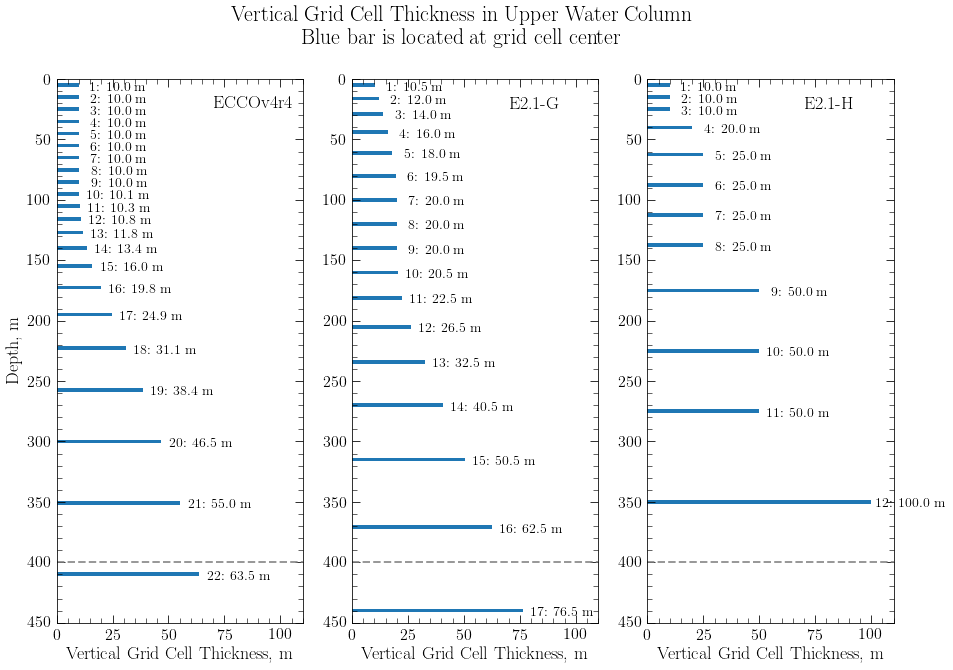

In [20]:
ncols = 3
fig,axs = plt.subplots(1,ncols,figsize=(15,10))

labels = ('ECCOv4r4','E2.1-G','E2.1-H')
for d,ax,lbl in zip([ds,gissg,gissh],axs,labels):
    if d.Z[0]<0:
        z=-d.Z
    else:
        z= d.Z
    if 'k' in d.dims:
        ll = [f'{int(x+1)}: {Z:.1f} m' for x,Z in zip(d.k.where(z<max_depth,drop=True).values,d.drF.where(z<max_depth,drop=True).values)]
    else:
        ll = [f'{int(x+1)}: {Z:.1f} m' for x,Z in enumerate(d.drF.where(z<max_depth,drop=True).values)]
        
    bars = ax.barh(z.where(z<max_depth,drop=True),d.drF.where(z<max_depth,drop=True),height=3);
    autolabel(bars,labels=ll)

    ax.invert_yaxis()
    ax.set(ylim=[450,0],xlim=[0,110],ylabel='Depth, m',
           xlabel=f'Vertical Grid Cell Thickness, m');
    
    ax.text(70,25,lbl)#bbox={'facecolor':'white','boxstyle':'round,pad=.5'})
    nice_inward_ticks(ax,xminor_skip=5,yminor_skip=10)
    ax.axhline(y=400,xmin=0,xmax=110,color='gray',alpha=.8,linestyle='--')

[ax.set_ylabel('') for ax in axs[1:]];

fig.suptitle('Vertical Grid Cell Thickness in Upper Water Column\nBlue bar is located at grid cell center',y=.98)
fig.savefig(f'{fig_dir}/compare_grid_layer_thickness.png',
            bbox_inches='tight',dpi=300,pad_inches=1)

## Now compare to ADCP 

In [48]:
adcp = xr.open_dataset('/mnt/data/datasets/tao_triton/adcp_xyzt_dy.cdf')
adcp = adcp.sel(lon=220,lat=0)
adcp = adcp.rename({'U_1205':'uvel','V_1206':'vvel'})

In [49]:
def replace_nans(ds,fld):
    ds[fld] = xr.where(ds[fld]==ds.missing_value,np.NAN,ds[fld])
    return ds[fld]

In [50]:
for f in adcp.data_vars:
    adcp[f] = replace_nans(adcp,f)

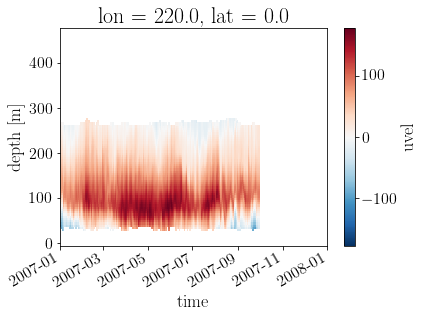

In [52]:
adcp.uvel.sel(time=slice('2007','2007')).plot()

In [53]:
adcp.depth

<xarray.DataArray 'depth' (depth: 95)>
array([  0.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,
        65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105., 110., 115., 120.,
       125., 130., 135., 140., 145., 150., 155., 160., 165., 170., 175., 180.,
       185., 190., 195., 200., 205., 210., 215., 220., 225., 230., 235., 240.,
       245., 250., 255., 260., 265., 270., 275., 280., 285., 290., 295., 300.,
       305., 310., 315., 320., 325., 330., 335., 340., 345., 350., 355., 360.,
       365., 370., 375., 380., 385., 390., 395., 400., 405., 410., 415., 420.,
       425., 430., 435., 440., 445., 450., 455., 460., 465., 470., 475.],
      dtype=float32)
Coordinates:
    lon      float32 220.0
    lat      float32 0.0
  * depth    (depth) float32 0.0 10.0 15.0 20.0 25.0 ... 460.0 465.0 470.0 475.0
Attributes:
    FORTRAN_format:  
    units:           m
    type:            UNEVEN
    epic_code:       3
    positive:        down
    standard_name:   depth

In [55]:
drf = np.array([5,7.5]+[5]*(len(adcp.depth)-2))
adcp['drF'] = xr.DataArray(drf,coords=adcp.depth.coords,dims=adcp.depth.dims)

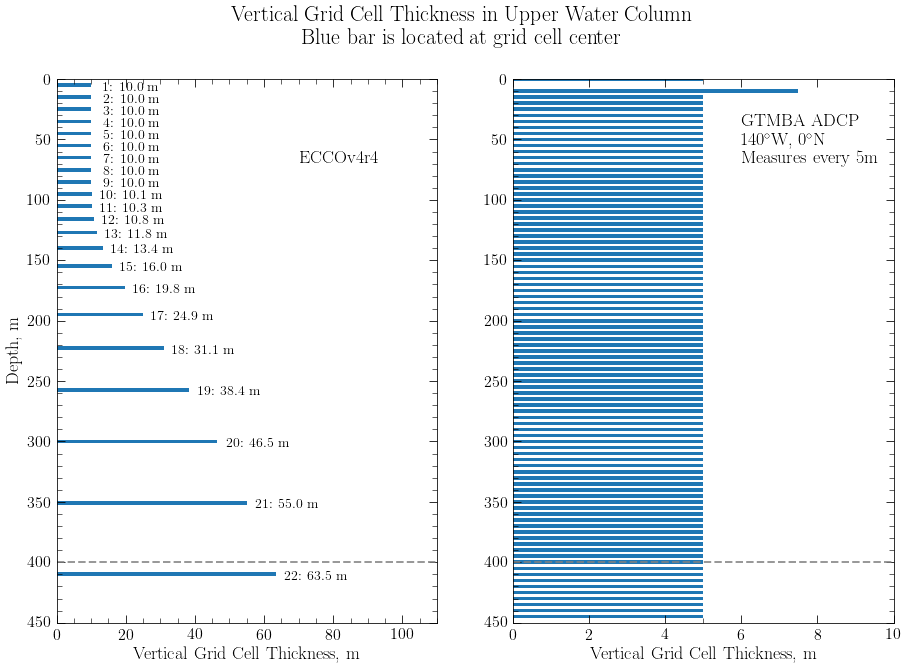

In [66]:
ncols = 2
fig,axs = plt.subplots(1,ncols,figsize=(15,10))

labels = ('ECCOv4r4','GTMBA ADCP\n'+r'140$^\circ$W, 0$^\circ$N'+'\nMeasures every 5m')
for d,ax,lbl,xmax in zip([ds,adcp],axs,labels,[110,10]):
    if 'Z' in d.coords:
        if d.Z[0]<0:
            z=-d.Z
        else:
            z= d.Z
        if 'k' in d.dims:
            ll = [f'{int(x+1)}: {Z:.1f} m' for x,Z in zip(d.k.where(z<max_depth,drop=True).values,d.drF.where(z<max_depth,drop=True).values)]
        else:
            ll = [f'{int(x+1)}: {Z:.1f} m' for x,Z in enumerate(d.drF.where(z<max_depth,drop=True).values)]
    else:
        z=d.depth
        ll = ['']*len(z)
        
    bars = ax.barh(z.where(z<max_depth,drop=True),d.drF.where(z<max_depth,drop=True),height=3);
    autolabel(bars,labels=ll)

    ax.invert_yaxis()
    ax.set(ylim=[450,0],xlim=[0,xmax],ylabel='Depth, m',
           xlabel=f'Vertical Grid Cell Thickness, m');
    
    if xmax == 110:
        ax.text(70,70,lbl)#bbox={'facecolor':'white','boxstyle':'round,pad=.5'})
    elif xmax == 10:
        ax.text(6,70,lbl)#bbox={'facecolor':'white','boxstyle':'round,pad=.5'})
    else:
        raise NotImplementedError('xmax is what?')
    nice_inward_ticks(ax,xminor_skip=5,yminor_skip=10)
    ax.axhline(y=400,xmin=0,xmax=xmax,color='gray',alpha=.8,linestyle='--')

[ax.set_ylabel('') for ax in axs[1:]];

fig.suptitle('Vertical Grid Cell Thickness in Upper Water Column\nBlue bar is located at grid cell center',y=.98)
fig.savefig(f'{fig_dir}/compare_ecco_adcp_vertical.png',
            bbox_inches='tight',dpi=300,pad_inches=1)

In [76]:
max_depth = 90

In [77]:
min_depth = 60

In [87]:
np.array(ll)[]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 89 but corresponding boolean dimension is 17

In [91]:
ind =adcp.depth.where((z<max_depth),drop=True)

In [92]:
ind

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 65.,
       70., 75., 80., 85.], dtype=float32)

In [88]:
np.array(ll)

array(['1: 5.0 m', '2: 7.5 m', '3: 5.0 m', '4: 5.0 m', '5: 5.0 m',
       '6: 5.0 m', '7: 5.0 m', '8: 5.0 m', '9: 5.0 m', '10: 5.0 m',
       '11: 5.0 m', '12: 5.0 m', '13: 5.0 m', '14: 5.0 m', '15: 5.0 m',
       '16: 5.0 m', '17: 5.0 m', '18: 5.0 m', '19: 5.0 m', '20: 5.0 m',
       '21: 5.0 m', '22: 5.0 m', '23: 5.0 m', '24: 5.0 m', '25: 5.0 m',
       '26: 5.0 m', '27: 5.0 m', '28: 5.0 m', '29: 5.0 m', '30: 5.0 m',
       '31: 5.0 m', '32: 5.0 m', '33: 5.0 m', '34: 5.0 m', '35: 5.0 m',
       '36: 5.0 m', '37: 5.0 m', '38: 5.0 m', '39: 5.0 m', '40: 5.0 m',
       '41: 5.0 m', '42: 5.0 m', '43: 5.0 m', '44: 5.0 m', '45: 5.0 m',
       '46: 5.0 m', '47: 5.0 m', '48: 5.0 m', '49: 5.0 m', '50: 5.0 m',
       '51: 5.0 m', '52: 5.0 m', '53: 5.0 m', '54: 5.0 m', '55: 5.0 m',
       '56: 5.0 m', '57: 5.0 m', '58: 5.0 m', '59: 5.0 m', '60: 5.0 m',
       '61: 5.0 m', '62: 5.0 m', '63: 5.0 m', '64: 5.0 m', '65: 5.0 m',
       '66: 5.0 m', '67: 5.0 m', '68: 5.0 m', '69: 5.0 m', '70: 5.0 m',
 

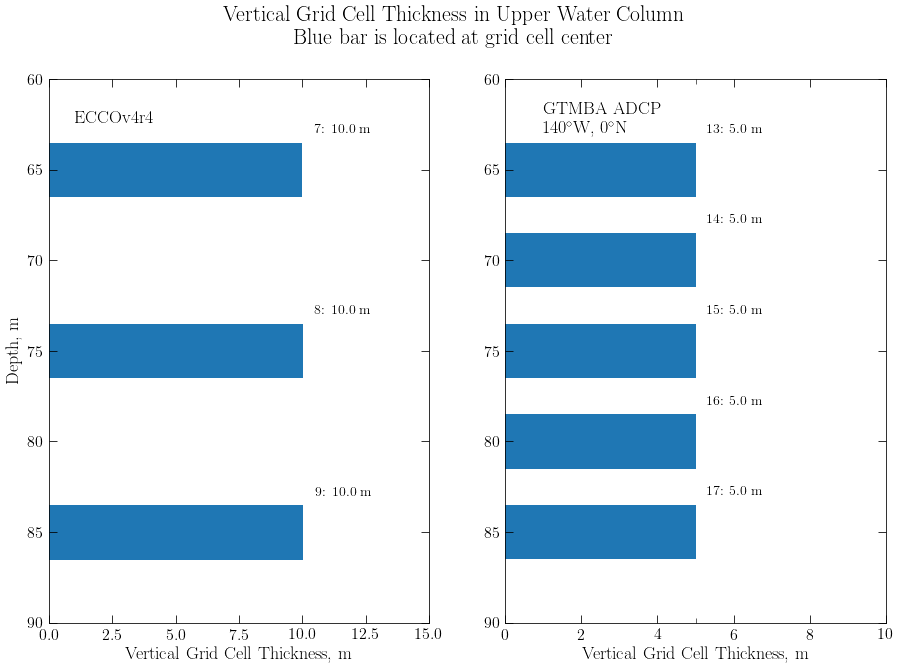

In [111]:
ncols = 2
fig,axs = plt.subplots(1,ncols,figsize=(15,10))

labels = ('ECCOv4r4','GTMBA ADCP\n'+r'140$^\circ$W, 0$^\circ$N')
for d,ax,lbl,xmax in zip([ds,adcp],axs,labels,[15,10]):
    if 'Z' in d.coords:
        if d.Z[0]<0:
            z=-d.Z
        else:
            z= d.Z
        if 'k' in d.dims:
            ll = [f'{int(x+1)}: {Z:.1f} m' for x,Z in zip(d.k.where(z<max_depth,drop=True).values,d.drF.where(z<max_depth,drop=True).values)]
        else:
            ll = [f'{int(x+1)}: {Z:.1f} m' for x,Z in enumerate(d.drF.where(z<max_depth,drop=True).values)]
    else:
        z=d.depth
        ll = [f'{int(x+1)}: {Z:.1f} m' for x,Z in enumerate(d.drF.where(z<max_depth,drop=True).values)]
        
    ind = ~np.isnan(d.drF.where(z<max_depth,drop=True).where(z>min_depth).values)
    ll = list(np.array(ll)[ind])
    bars = ax.barh(z.where(z<max_depth,drop=True)[ind],d.drF.where(z<max_depth,drop=True)[ind],height=3);
    ax = autolabel(bars,labels=ll)

    ax.invert_yaxis()
    ax.set(ylim=[90,60],xlim=[0,xmax],ylabel='Depth, m',
           xlabel=f'Vertical Grid Cell Thickness, m');
    
    if xmax == 110:
        ax.text(70,71,lbl)
    elif xmax == 10:
        ax.text(1,63,lbl)
    elif xmax == 15:
        ax.text(1,62.5,lbl)
    else:
        raise NotImplementedError('xmax is what?')
    nice_inward_ticks(ax,xminor_skip=5,yminor_skip=10)

[ax.set_ylabel('') for ax in axs[1:]];

fig.suptitle('Vertical Grid Cell Thickness in Upper Water Column\nBlue bar is located at grid cell center',y=.98)
fig.savefig(f'{fig_dir}/compare_ecco_adcp_vertical_zoom.png',
            bbox_inches='tight',dpi=300,pad_inches=1)

## ECCO v4r4

In [115]:
plt.rcParams.update({'text.usetex':False})

In [128]:
ds.XC.sel(tile=8)[:,10].values

array([ 142.5,  143.5,  144.5,  145.5,  146.5,  147.5,  148.5,  149.5,
        150.5,  151.5,  152.5,  153.5,  154.5,  155.5,  156.5,  157.5,
        158.5,  159.5,  160.5,  161.5,  162.5,  163.5,  164.5,  165.5,
        166.5,  167.5,  168.5,  169.5,  170.5,  171.5,  172.5,  173.5,
        174.5,  175.5,  176.5,  177.5,  178.5,  179.5, -179.5, -178.5,
       -177.5, -176.5, -175.5, -174.5, -173.5, -172.5, -171.5, -170.5,
       -169.5, -168.5, -167.5, -166.5, -165.5, -164.5, -163.5, -162.5,
       -161.5, -160.5, -159.5, -158.5, -157.5, -156.5, -155.5, -154.5,
       -153.5, -152.5, -151.5, -150.5, -149.5, -148.5, -147.5, -146.5,
       -145.5, -144.5, -143.5, -142.5, -141.5, -140.5, -139.5, -138.5,
       -137.5, -136.5, -135.5, -134.5, -133.5, -132.5, -131.5, -130.5,
       -129.5, -128.5])

In [130]:
ds.YC.sel(tile=8)[0,:].values

array([  9.48239787,   8.51625314,   7.56996161,   6.65640946,
         5.78982774,   4.98269389,   4.24272127,   3.57148241,
         2.96505256,   2.41583366,   1.91446483,   1.45120201,
         1.01666545,   0.60210432,   0.19936521,  -0.19936521,
        -0.60210432,  -1.01666545,  -1.45120201,  -1.91446483,
        -2.41583366,  -2.96505256,  -3.57148241,  -4.24272127,
        -4.98269389,  -5.78982774,  -6.65640946,  -7.56996161,
        -8.51625314,  -9.48239787, -10.45864174, -11.43858506,
       -12.41846629, -13.39622873, -14.3707681 , -15.34145389,
       -16.30787011, -17.26969165, -18.22663153, -19.17842054,
       -20.12480018, -21.06552051, -22.00033971, -22.92902401,
       -23.85134786, -24.76709405, -25.67605389, -26.57802724,
       -27.47282265, -28.36025744, -29.24015766, -30.11235823,
       -30.97670283, -31.83304397, -32.68124289, -33.52116955,
       -34.35270255, -35.17572902, -35.99014456, -36.79585308,
       -37.59276671, -38.38080565, -39.15989801, -39.92

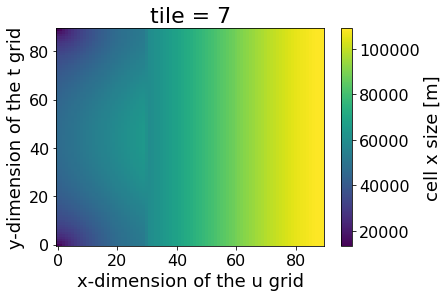

In [129]:
ds.dxC.sel(tile=7).plot()

In [131]:
ds.dxC.dims

('tile', 'j', 'i_g')

In [ ]:
ecco_center_points = ds.XC.sel(tile=8)
ecco_dLon = ds.dxC.sel(tile=8).sel()

In [ ]:
nrows= 3
fig,axs = plt.subplots(nrows,1,figsize=(12,nrows*4))

ax=axs[0]
ax.plot(ecco_center_points,ecco_dLat,marker='.',markersize=10,color='k')
ax.plot(ecco_bds,ecco_dLatMid,marker='|',markersize=30,markeredgewidth=3,linestyle='',color='k')
ax.set(ylim=[44,54],xlim=[-2.1,2.1])
ax.text(-0.2,52,'ECCOv4')

ax = axs[1]
g = ax.plot(gissg_center_points,gissg_dLat,marker='.',markersize=10,color='k')
ax.plot(gissg_bds,gissg_dLatMid,marker='|',markersize=30,markeredgewidth=3,linestyle='',color=g[0].get_color())
ax.set(ylim=[108,114],xlim=[-2.1,2.1])
ax.text(-0.15,113,'E2.1-G')#,bbox={'facecolor':'white','boxstyle':'round,pad=.5'})

ax = axs[2]
h = ax.plot(gissh_center_points,gissh_dLat,marker='.',markersize=10,color='k')
ax.plot(gissh_bds,gissh_dLatMid,marker='|',markersize=30,markeredgewidth=3,linestyle='',color=h[0].get_color())
ax.set(ylim=[108,114],xlim=[-2.1,2.1])
ax.text(-0.15,113,'E2.1-H')#,bbox={'facecolor':'white','boxstyle':'round,pad=.5'})


fig.suptitle(f'Grid cell width in meridional direction near the equator\n'+
              'Dots indicate the grid cell center, Vertical lines indicate grid cell edges',y=.95)
[ax.set_ylabel('Grid cell width, km') for ax in axs]
[ax.set_xticklabels([r'%.1f$^\circ$%s' % (x,y) for x,y in \
                    zip([2,2,1.5,1,.5,0,.5,1,1.5,2],['S']*5+['']+['N']*4)]) for ax in axs]
[nice_inward_ticks(ax,xminor_skip=.1,yminor_skip=1) for ax in axs];
axs[2].set_xlabel('Latitude')
fig.savefig(f'{fig_dir}/compare_grid_cell_width_equator.png',
            bbox_inches='tight',dpi=300,pad_inches=1)